# Anomaly Detection Application for the KLT Paper

This notebook provides the figures for the Anomaly Detection application.

## Load the trajectory data, as usual

In [1]:
import numpy as np
import pickle 
from matplotlib import pyplot as plt 
trajectory_file = open("../spherical-code-paper/trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
del trajs
trajectory_file.close()
del trajectory_file

Text(0, 0.5, 'Roadwise coordinate (ft)')

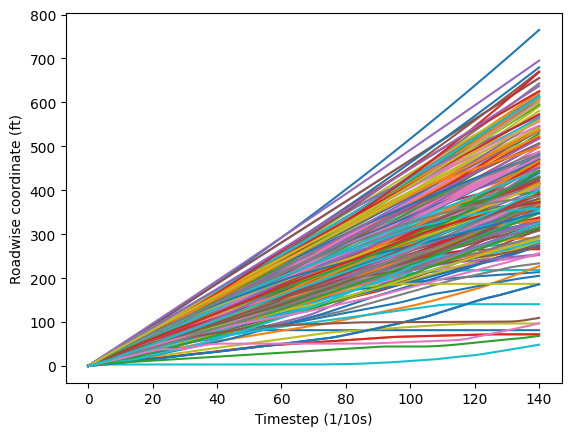

In [2]:
for traj in range(y_vec.shape[0]):
    plt.plot(y_vec[traj])
plt.xlabel('Timestep (1/10s)')
plt.ylabel('Roadwise coordinate (ft)')

# FPCA Decomposition

In [3]:
import skfda
fdgry = skfda.FDataGrid(y_vec, np.arange(y_vec.shape[1]))

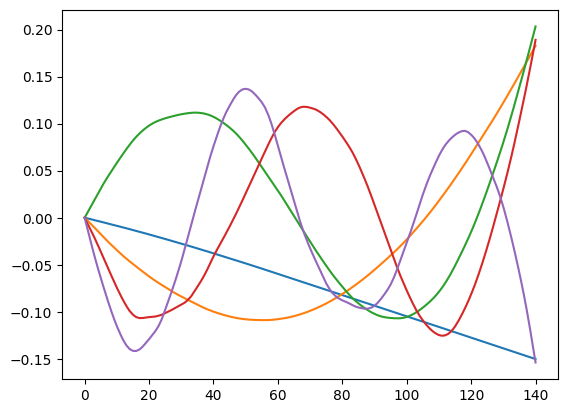

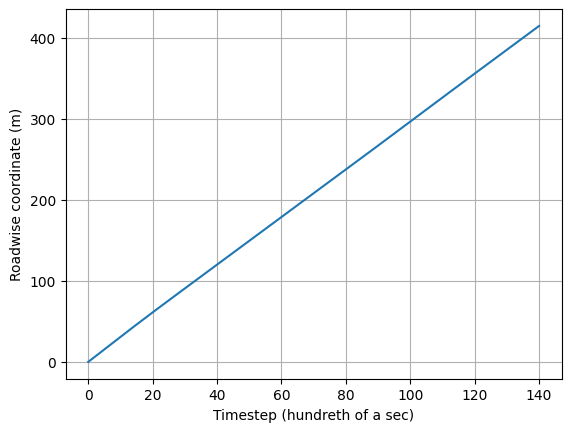

In [4]:
from skfda.preprocessing.dim_reduction.projection import FPCA

fpca_discretized_rw = FPCA(n_components=5)
fpca_discretized_rw.fit(fdgry)
fpca_discretized_rw.components_.plot()
fpca_discretized_rw.mean_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Roadwise coordinate (m)')
plt.grid(True)
print('')

In [5]:
# Get the FPCA scores for each trajectory
fpca_scores = fpca_discretized_rw.transform(fdgry)

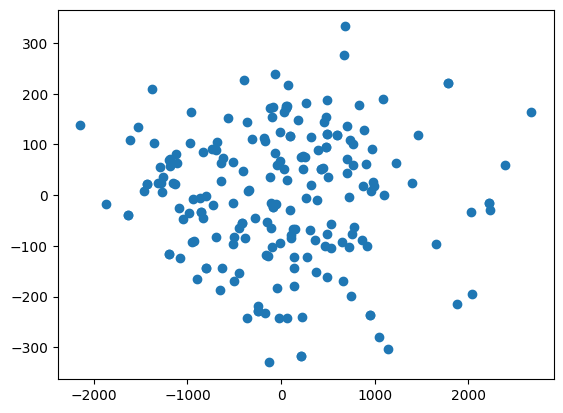

In [6]:
plt.scatter(fpca_scores[:,0], fpca_scores[:,1])

In [10]:
anom_score = fpca_scores[0,:] + np.array([-3000, 500, 0, 0, 0])

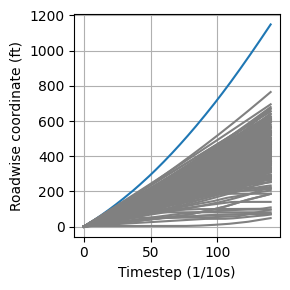

In [30]:
# Plot the corresponding trajectory
plt.figure(figsize=(3,3))
plt.plot(fpca_discretized_rw.inverse_transform(anom_score).data_matrix[0,:])
# Plot all trajectories
for traj in range(y_vec.shape[0]):
    plt.plot(y_vec[traj], color='gray')
plt.xlabel('Timestep (1/10s)')
plt.ylabel('Roadwise coordinate (ft)')
plt.grid(True)
plt.tight_layout()
plt.savefig('anomaly_traj.pdf')

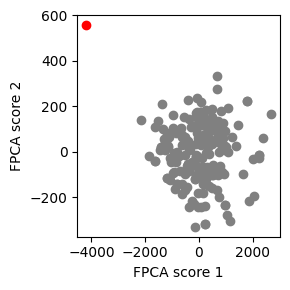

In [31]:
plt.figure(figsize=(3,3))
plt.scatter(anom_score[0], anom_score[1], color='red')
plt.scatter(fpca_scores[:,0], fpca_scores[:,1], color='gray')
plt.xlabel('FPCA score 1')
plt.ylabel('FPCA score 2')
plt.tight_layout()
plt.savefig('anomaly_scores.pdf')